## Importing Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Custom Implementation of Logistic Regression 

In [2]:
class CustomLogisticReg:
    def __init__(self , lr=0.01 ,iters =20):
        self._lr =lr
        self._iters = iters

    def fit(self,X,y):
        self._y = y.reshape(-1,1)
        # refer to 12.jpg
        X_mod = np.hstack([np.ones([len(X),1]),X])
        self._X = X_mod

        self._theta = np.zeros([X_mod.shape[1], 1])

        errors = []
        for i in range(self._iters):
            errors.append(self.error())
            self.gradient_ascent()
        # Updating theta
        self.theta_ = self._theta
        return errors


    def gradient_ascent(self):
        d_theta = self.gradient()
        self._theta -= d_theta


    def gradient(self):
        # yh stands for 'y-hypo' & ya for 'y-actual'
        # yh.shape = (100,1) 
        yh = self.hypothesis(self._X)          
        ya = self._y
        # for formula refer to 11.jpg
        # .T is for transpose (taken for dot multiplication)
        # diff.shape = (100,1)
        diff = -(ya - yh)
        # shape = (3,1)
        return np.dot(self._X.T , diff) * self._lr

    def hypothesis(self ,X):
        # X.shape = (100,3) ; theta.shape = (3,1) ; product.shape = (100,1)
        product  = np.dot(X , self._theta)

        return 1/(1 + np.exp(-product))

    def error(self):
        # error is log-likelihood 
        # we need to maximize error 
        # for formula refer 8.jpg

        yh = self.hypothesis(self._X)          
        ya = self._y

        ll = ya * np.log(yh) + (1-ya) * np.log(1-yh)

        return -np.mean(ll)

    
    def predict(self ,X):
        X_mod = np.hstack([np.ones([len(X),1]),X])
        yh = self.hypothesis(X_mod)

        return (yh>0.5).astype(int).flatten()

    def accuracy(self ,X ,y):
        yp = self.predict(X)
        return np.mean(yp==y) 


## Model Building

In [3]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## Visualization

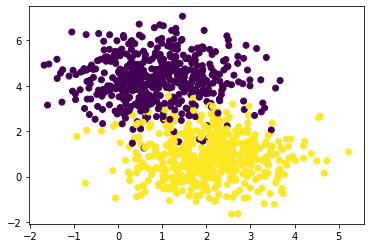

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
model = CustomLogisticReg()
errors = model.fit(X_train , y_train)

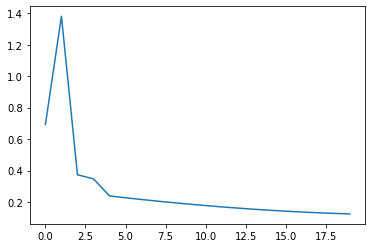

In [7]:
plt.plot(errors)

In [8]:
model.theta_

array([[ 3.4875743 ],
       [ 1.73510659],
       [-2.4108481 ]])

In [9]:
model.accuracy(X_test , y_test)

0.9454545454545454